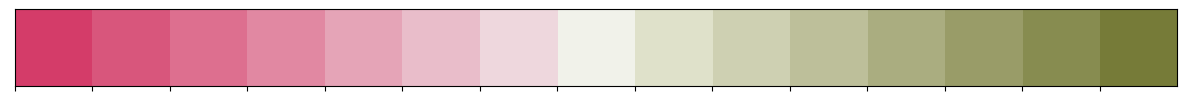

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
# titanic=sns.load_dataset("titanic")
# titanic.head()
sns.palplot(sns.diverging_palette(0, 90, n=15,sep=1))
plt.show()

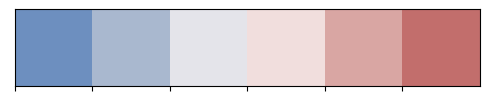

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.palplot(sns.color_palette('vlag'))
plt.show()

In [4]:
sns.blend_palette(["blue", "white", "red"], 12)

[(0.0, 0.0, 1.0),
 (0.1803921568627451, 0.1803921568627451, 1.0),
 (0.3607843137254902, 0.3607843137254902, 1.0),
 (0.5411764705882353, 0.5411764705882353, 1.0),
 (0.7294117647058823, 0.7294117647058823, 1.0),
 (0.9098039215686274, 0.9098039215686274, 1.0),
 (1.0, 0.9098039215686274, 0.9098039215686274),
 (1.0, 0.7294117647058824, 0.7294117647058824),
 (1.0, 0.5411764705882354, 0.5411764705882354),
 (1.0, 0.36078431372549025, 0.36078431372549025),
 (1.0, 0.18039215686274512, 0.18039215686274512),
 (1.0, 0.0, 0.0)]

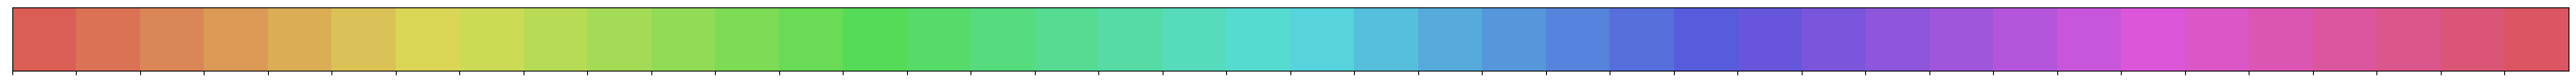

In [13]:
sns.palplot(sns.color_palette("hls", 40))
plt.show()

In [2]:
import numpy

def _priori_cluster(
	adata,
	n_domains =7,
	cluster_method = 'leiden',
	resolution: list = sorted(list(np.arange(0.01, 2, 0.01)), reverse=True),
	):
	if resolution[0] < resolution[1]:
		step_larger = True
	else:
		step_larger = False
	_step = abs(resolution[1] - resolution[0])
   
	res = resolution[0]
	while step_larger and res > resolution[-1] or !step_larger and res < resolution[-1]:
		if cluster_method == 'leiden':
			sc.tl.leiden(adata, random_state=0, resolution=res)
			count_unique = len(pd.DataFrame(adata.obs['leiden']).leiden.unique())
			print("resolution: ", res, "   count_unique_leiden: ", count_unique)
			if count_unique == n_domains:
				break
		else:
			sc.tl.louvain(adata, random_state=0, resolution=res)
			count_unique_louvain = len(pd.DataFrame(adata.obs['louvain']).louvain.unique())
			print("resolution: ", res, "   count_unique_louvain: ", count_unique)
			if count_unique == n_domains:
				break
		res = res + _step
		if step_larger and count_unique > n_domains:
			res = res - _step * 5
			_step = _step / 2
		if !step_larger and count_unique < n_domains:
			res = res + _step * 5
			_step = _step / 2
      
		
	print("Best resolution: ", res)
	return res


<class 'numpy.ndarray'>
(652, 2)
           align_x    align_y
10x10_A1 -6.481308 -12.553738
10x13_A1 -6.481308  -9.553738
10x14_A1 -6.481308  -8.553738
10x15_A1 -6.481308  -7.553738
10x16_A1 -6.481308  -6.553738
...            ...        ...
22x20_B1 -8.054035  -7.208306
23x20_B1 -8.606909  -6.375041
24x20_B1 -9.159782  -5.541776
23x21_B1 -9.440174  -6.927914
24x21_B1 -9.993047  -6.094649

[652 rows x 2 columns]
            align_x    align_y
10x10_A1  10.000000  10.000000
10x13_A1  10.000000  13.000000
10x14_A1  10.000000  14.000000
10x15_A1  10.000000  15.000000
10x16_A1  10.000000  16.000000
...             ...        ...
22x20_B1   8.905117  19.365540
23x20_B1   5.297188  24.856911
24x20_B1  10.000152  18.035719
23x21_B1   7.976959  16.712975
24x21_B1   8.710799  16.256937

[652 rows x 2 columns]


In [1]:
import scanpy as sc
from sklearn.datasets import load_iris

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
matrix = data.data
n_comps = min(matrix.shape)
svd_solver = "full"

pca = sc.tl.pca(
            matrix,
            n_comps=n_comps,
            use_highly_variable=False,
            return_info=True,
            svd_solver=svd_solver,
            copy=True,
        )
pca[0]
pca[1]
pca[2]
pca[3]

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])